In [ ]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
import torch
x = torch.ones(1, 3, 64, 64)

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

output_tensor = model(x, torch.tensor([0]))
print(output_tensor.size())

In [5]:
# join the path
import os
for dirname, _, filenames in os.walk('/pokemon_images'):
    print(dirname, filenames)
    
# for dirname, _, filenames in os.walk('/pokemon_images'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

5


In [6]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = False
)

diffusion = GaussianDiffusion(
    model,
    image_size = 64,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 1000    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
)

trainer = Trainer(
    diffusion,
    'pokemon_images',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 20000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = True,              # whether to calculate fid during training
    save_and_sample_every = 5000,
    num_fid_samples = 2
)

trainer.train()

/home/chindana001/miniconda3/envs/hw08/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/chindana001/miniconda3/envs/hw08/lib/python3.9/site-packages/accelerate/accelerator.py:447: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(split_batches=True)
  warnings.warn(


  0%|          | 0/6 [00:00<?, ?it/s]/home/chindana001/miniconda3/envs/hw08/lib/python3.9/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
loss: 0.3497:  67%|██████▋   | 4/6 [00:05<00:01,  1.20it/s]

Evaluate model
This is in inference mode


sampling loop time step: 100%|██████████| 1000/1000 [00:54<00:00, 18.29it/s]


Saving images....
Dataset stats loaded from disk.
Stacking Inception features for 2 generated samples.



















































































































































100%|██████████| 1/1 [00:16<00:00, 16.43s/it]


fid_score: 478.9302618816376
save best model


loss: 0.3497:  83%|████████▎ | 5/6 [02:15<00:47, 47.77s/it]

Finish


loss: 0.3675: 100%|██████████| 6/6 [02:16<00:00, 22.70s/it]

training complete


sampling loop time step: 100%|██████████| 1000/1000 [00:16<00:00, 61.23it/s]


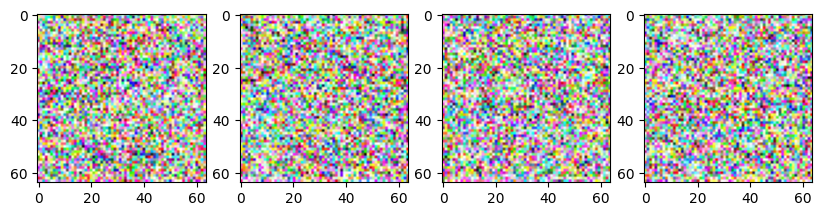

In [7]:
import matplotlib.pyplot as plt 
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
col = 0
for img in sampled_images:
    # swap channel to the last dimension
    img = img.permute(1, 2, 0)

    img_np = img.detach().cpu().numpy()
    imgplot = axes[col].imshow(img_np)
    col+=1


In [ ]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
model2 = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = False
)

diffusion2 = GaussianDiffusion(
    model2,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 1000    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
)

trainer2 = Trainer(
    diffusion2,
    'pokemon_images',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

trainer2.load(1)